# Student Performance Prediction
##### In this session, we aim to predict a student's Performance Index based on features like `study hours`, `previous scores`, `extracurricular activities`, `sleep hours`, and `practice papers`.

The machine learning process (often called the **ML Pipeline** or **Lifecycle**) follows a standard series of steps to move from raw data to a working prediction model. Here are the essential steps, using our **Student Performance** project as a concrete example:

### 1. Problem Definition
Before touching data, you must define what you are trying to solve.
* **Goal:** Predict the `Performance Index` (a continuous numerical value).
* **Type of ML:** This is a **Regression** task because the target variable is a number, not a category.

### 2. Data Collection
Gathering the raw information needed for the task.
* **In our case:** We are using `StudentPerformance.csv`, which contains 10,000 records of student data.

### 3. Data Exploration (EDA)
Analyzing the data to understand patterns, distributions, and outliers.
* **Action:** Using `.describe()` to see statistical summaries or `.corr()` to identify which features (like "Hours Studied") have the strongest relationship with the score.
* **Visualization:** Plotting histograms and scatter plots to visualize data distribution and trends.

### 4. Data Preprocessing & Cleaning
Preparing the data so the computer can understand it.
* **Handling Duplicates:** Using `df[df.duplicated(keep=False)]` to inspect and then remove repeated entries.
* **Handling Categorical Data:** Converting text like "Yes/No" (Extracurriculars) into numbers ($1$/$0$) because mathematical models require numerical input.
* **Missing Values:** Checking for null values and deciding whether to fill them or drop them.

### 5. Feature Selection & Engineering
Deciding which variables (features) are actually useful for the model.
* **In our case:** Using features like `Sleep Hours` and `Previous Scores`. If a column was irrelevant (like a "Student Name"), we would drop it here.

### 6. Splitting the Dataset
You cannot test the model on the same data it learned from.
* **Training Set (80%):** Data used to `teach` the model.
* **Testing Set (20%):** Data used to evaluate how the model performs on "unseen" information.

### 7. Model Selection
Choosing the right algorithm for the job.
* **Linear Regression:** A great starting point for predicting scores.
* **Decision Trees/Random Forests:** More complex alternatives if the relationship between variables is non-linear.

### 8. Training the Model
The actual "Learning" phase.
* **Action:** Feeding the training data into the algorithm. The model looks for the mathematical formula that best connects the input features to the `Performance Index`.

### 9. Model Evaluation
Checking the accuracy of the model.
* **Metrics:** Using **R-squared** ($R^2$) to see how much of the variance is explained, and **Mean Squared Error** ($MSE$) to see the average prediction error.

### 10. Hyperparameter Tuning (Optimization)
Fine-tuning the settings of the model to maximize accuracy. 
>Note: For simple Linear Regression, this step is minimal, but for complex models, it is critical.*

### 11. Prediction & Deployment
Using the finished model to predict scores for new students or integrating it into a production application.

---

### Summary Checklist/steps for your Notebook in this session:
-  **Import** libraries (pandas, sklearn, etc.).
-  **Load** the CSV file.
-  **Clean** the data (Duplicates/Nulls).
-  **Encode** categorical variables (Yes/No $\rightarrow$ $1$/$0$).
-  **Split** the data (Train/Test).
-  **Train** the model (`model.fit`).
-  **Evaluate** results (Check $R^2$ and $MSE$).

$\color{blue}{\text{Lets go}}$

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load & Explore Data

####  Loading data 

In [6]:
df=pd.read_csv('StudentPerformance.csv')

#### Inspect first five rows

In [8]:
df.head() #you can pass any number here to return above or below 5 rows

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


#### Inspect last five rows

In [10]:
df.tail() #you can pass any number here to return above or below 5 rows

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23
9996,7,64,Yes,8,5,58
9997,6,83,Yes,8,5,74
9998,9,97,Yes,7,0,95
9999,7,74,No,8,1,64


#### Check data types and missing values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


#### Inspecting the shape of our dataset

In [14]:
df.shape

(10000, 6)

#### Check existing colums

In [16]:
df.columns.to_list()

['Hours Studied',
 'Previous Scores',
 'Extracurricular Activities',
 'Sleep Hours',
 'Sample Question Papers Practiced',
 'Performance Index']

#### Taking a sample from existing dataset

In [18]:
df.sample(2) #you can pass any number here to return above or below 5 rows

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
5842,9,54,Yes,7,3,52
6833,5,44,Yes,7,5,27


#### Generate summary statistics

In [20]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


#### Checking for `null` and `duplicates` value

In [22]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [23]:
df.duplicated().any()

True

In [24]:
df.duplicated().sum()

127

In [25]:
df[df.duplicated()]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48
1477,7,61,Yes,6,8,54
1601,5,99,No,7,5,89
1786,2,62,Yes,9,4,40
2026,5,87,Yes,6,7,74
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71
9940,8,95,No,5,2,90
9954,6,97,No,8,7,92
9966,1,41,No,7,3,12


> **Note:** Use `keep=False` when you want to isolate all records involved in a duplication to investigate data entry errors.

| Argument | Result |
| :--- | :--- |
| `keep='first'` | Marks all duplicates as `True` **except** for the first occurrence. |
| `keep='last'` | Marks all duplicates as `True` **except** for the last occurrence. |
| `keep=False` | Marks **every** occurrence of a duplicate as `True`. |

In [28]:
df[df.duplicated(keep=False)]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
202,9,52,No,5,9,48
212,5,41,No,8,4,26
415,2,81,No,6,1,59
426,9,86,Yes,6,9,83
507,4,70,Yes,6,8,53
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71
9940,8,95,No,5,2,90
9954,6,97,No,8,7,92
9966,1,41,No,7,3,12


#### Removing duplicates

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df.duplicated().any()

False

In [32]:
df.shape

(9873, 6)

In [33]:
df.dtypes

Hours Studied                        int64
Previous Scores                      int64
Extracurricular Activities          object
Sleep Hours                          int64
Sample Question Papers Practiced     int64
Performance Index                    int64
dtype: object

#### Basic visualizations

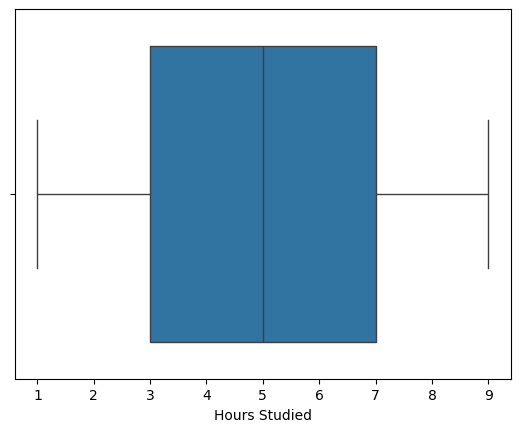

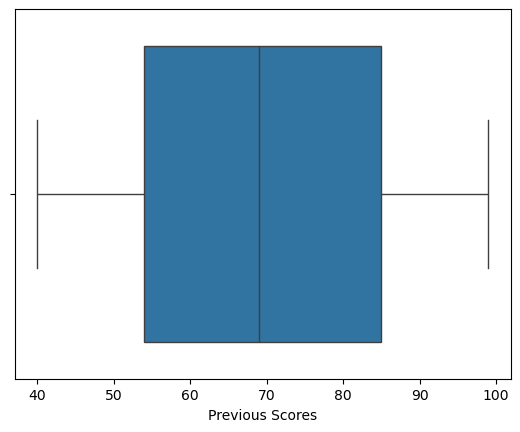

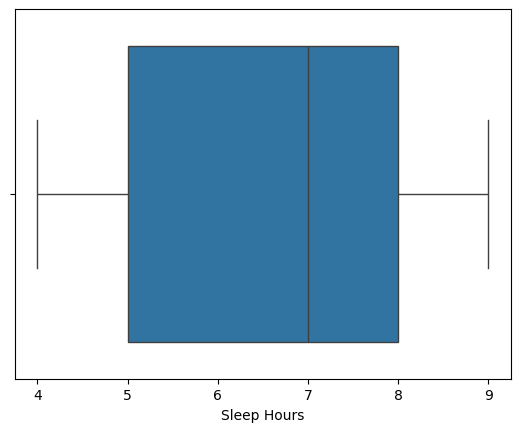

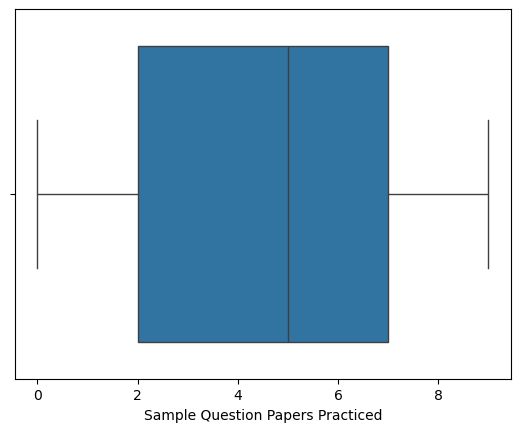

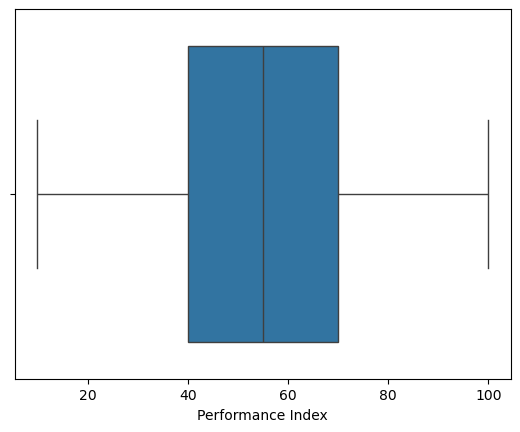

In [35]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

> ***Question: Is there any outlier in our dataset?***

#### Visualization of categorical columns

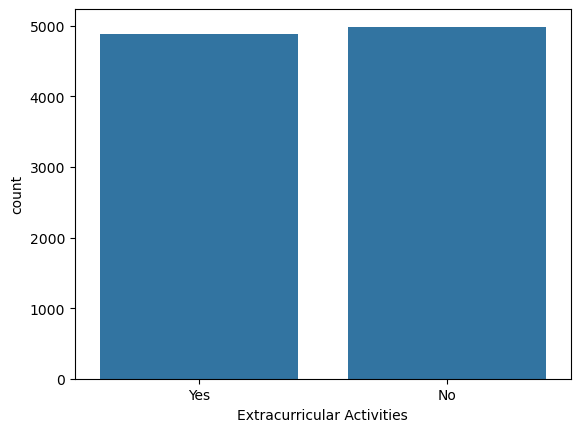

In [38]:
sns.countplot(x='Extracurricular Activities',data=df)
plt.show()

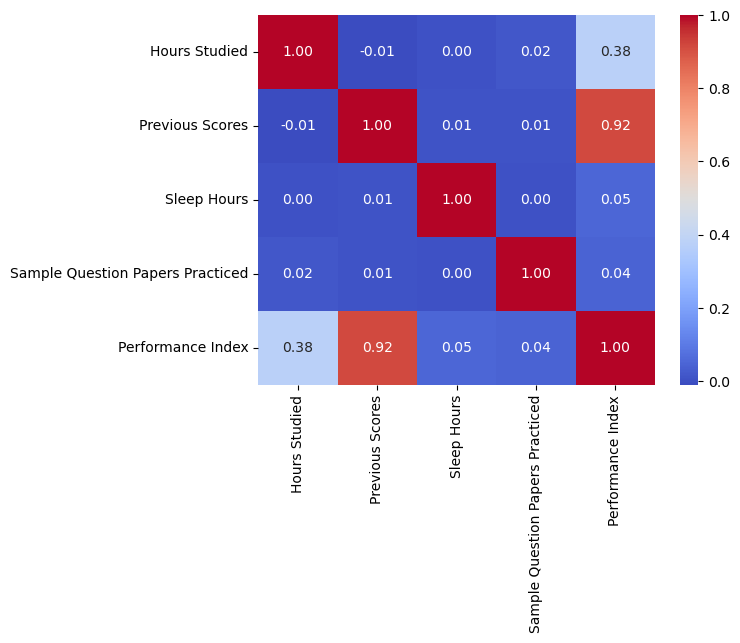

In [39]:
sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            cmap='coolwarm', fmt=".2f")
plt.show()

# 2. Data Preprocessing

#### Explore how many participate in `Extracurricular Activities`

In [42]:
df['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     4986
Yes    4887
Name: count, dtype: int64

#### We need to convert the categorical variable `Extracurricular Activities` (Yes/No) into ***numerical format***

In [44]:
df['Extracurricular Activities']=df['Extracurricular Activities'].map({'Yes':1,'No':0})

In [45]:
df['Extracurricular Activities']

0       1
1       0
2       1
3       1
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    0
Name: Extracurricular Activities, Length: 9873, dtype: int64

# 3. Model training

#### Splitting the data into `Training` and `Testing` sets, then training a Linear Regression model.

In [48]:
# Define Features (X) and Target (y)
X=df.drop('Performance Index',axis=1)
y=df['Performance Index']

In [49]:
from sklearn.model_selection import train_test_split
# Split data (80% Train, 20% Test)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### Scaling the value before feeding them into the model

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#### Selecting, building the model and training it

In [53]:
from sklearn.linear_model import LinearRegression
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)
print("Model trained successfully.")

Model trained successfully.


# 4. Model Evaluation

#### Evaluating how well the model predicts student performance using `R-squared` and `Mean Squared Error`.

In [56]:
# Make predictions
y_pred = model.predict(X_test)

In [57]:
y_actual_score=y_test.reset_index().drop(columns=['index'])

In [58]:
result=pd.concat((pd.Series(y_pred),y_actual_score),axis=1)
result.columns=['Predicted_Values','Actual_Values']
result

,Predicted_Values,Actual_Values
0,46.480013,47
1,80.285379,76
2,61.065188,62
3,22.706315,23
4,74.836868,76
...,...,...
1970,18.277835,19
1971,40.310084,39
1972,77.084436,77
1973,86.246766,88


In [59]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R² Score:", model.score(X_test, y_test))

Intercept: 55.095973664218796
Coefficients: [ 7.37331598 17.6199308   0.28690619  0.80213836  0.54005309]
R² Score: 0.9884301209927054


#### Evaluating the model constructed so far

In [61]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)
print("Train R²:", model.score(X_train, y_train))
print("Test R²:", model.score(X_test, y_test))

MSE: 4.305900938538476
R²: 0.9884301209927054
Train R²: 0.9887391160677558
Test R²: 0.9884301209927054


#### Visualization of Actual vs Predicted

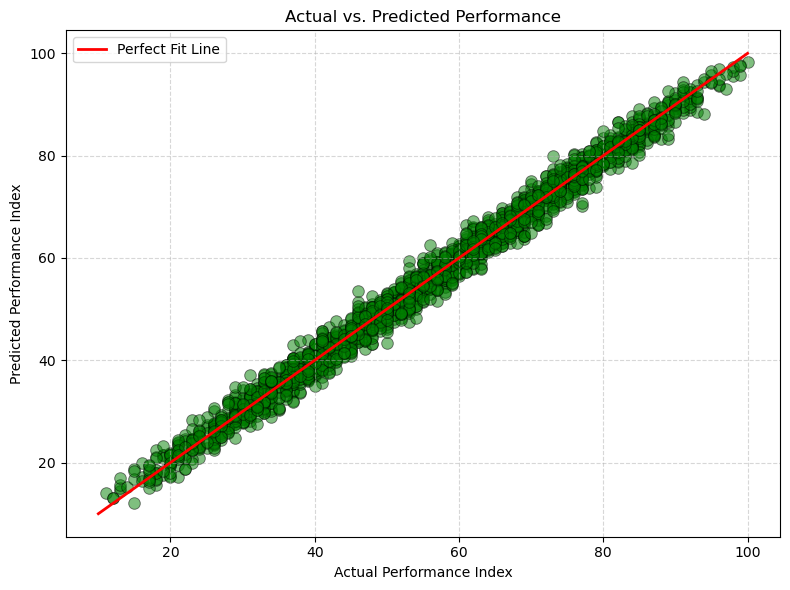

In [63]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='green', s=70, edgecolor='black', alpha=0.50)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linewidth=2, label='Perfect Fit Line')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs. Predicted Performance')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 5. Feature Importance

#### Looking at the coefficients to see which factors matter most.

In [66]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
display(coefficients)

,Feature,Coefficient
1,Previous Scores,17.619931
0,Hours Studied,7.373316
3,Sleep Hours,0.802138
4,Sample Question Papers Practiced,0.540053
2,Extracurricular Activities,0.286906


> ***Note:*** Based on the R-squared value and coefficients, we can conclude which habits (like Hours Studied or Previous Scores) are the strongest predictors of academic success.